# 第一题 模拟简谐振子

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
delta_t=0.0002
t=np.linspace(0,20,100000)
x=np.zeros_like(t)
v=np.zeros_like(t)
a=np.zeros_like(t)

In [137]:
t[99999]

20.0

## 设置初值条件

In [138]:
x[0]=1

## 使用velocity-verlet算法

In [139]:
for i in range(99999):
    x[i+1]=x[i]+0.0002*v[i]+0.5*(delta_t)*(delta_t)*a[i]
    v_temp=v[i]+0.5*delta_t*a[i]
    a[i+1]=-x[i+1]
    v[i+1]=v_temp+0.5*delta_t*a[i+1]

## x-t图像

<IPython.core.display.Javascript object>


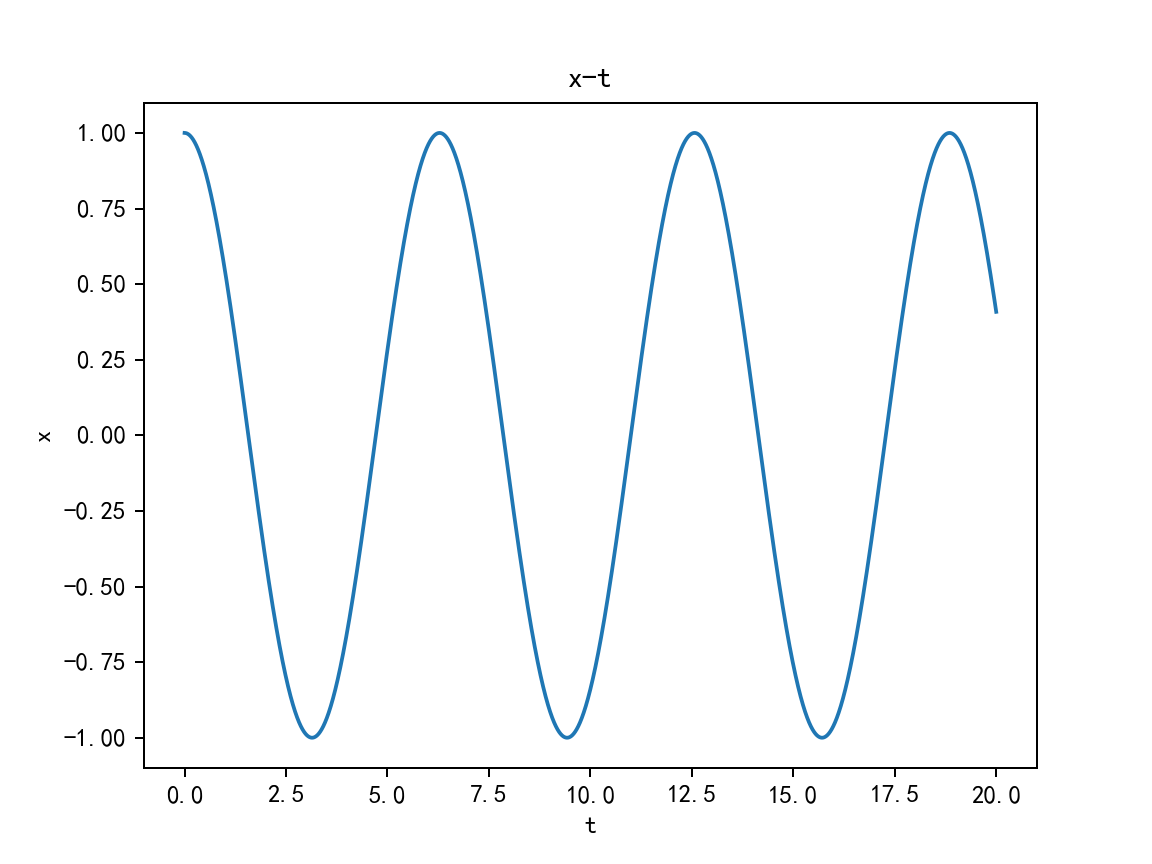

In [153]:
plt.figure()
plt.plot(t,x)
plt.title("x-t")
plt.xlabel('t')
plt.ylabel('x')
plt.show()

## v-x图像

<IPython.core.display.Javascript object>


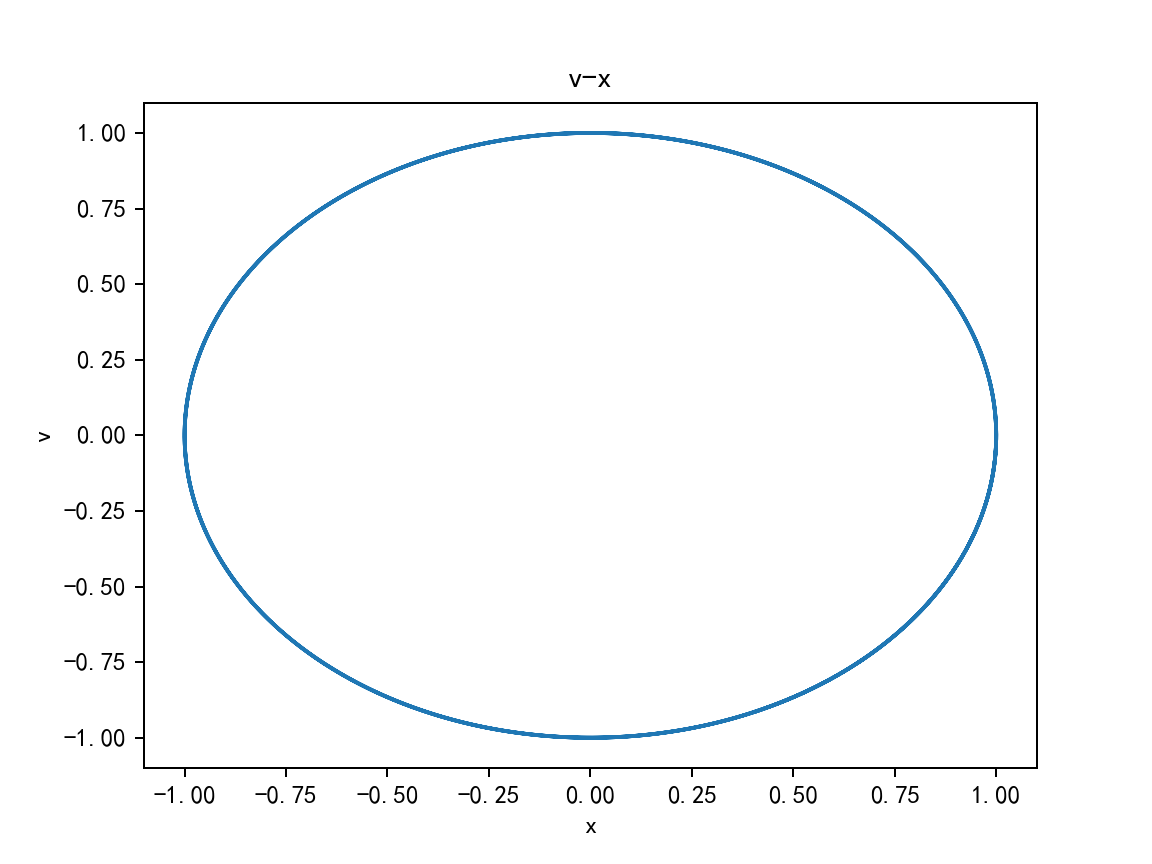

In [160]:
plt.figure()
plt.plot(x,v)
plt.title("v-x")
plt.xlabel('x')
plt.ylabel('v')
plt.show()

## 检验能量是否守恒

In [156]:
E=np.zeros_like(t)

$E=\frac{1}{2}mv^{2}+\frac{1}{2}kx^{2}$
又有$k=m=1$<br>
$\therefore E(t)=\frac{1}{2}v(t)^{2}+\frac{1}{2}x(t)^{2}$

In [157]:
for i in range(99999):
    E[i]=0.5*v[i]*v[i]+0.5*x[i]*x[i]

In [182]:
t1=t[0:99998]
E1=E[0:99998]

<IPython.core.display.Javascript object>


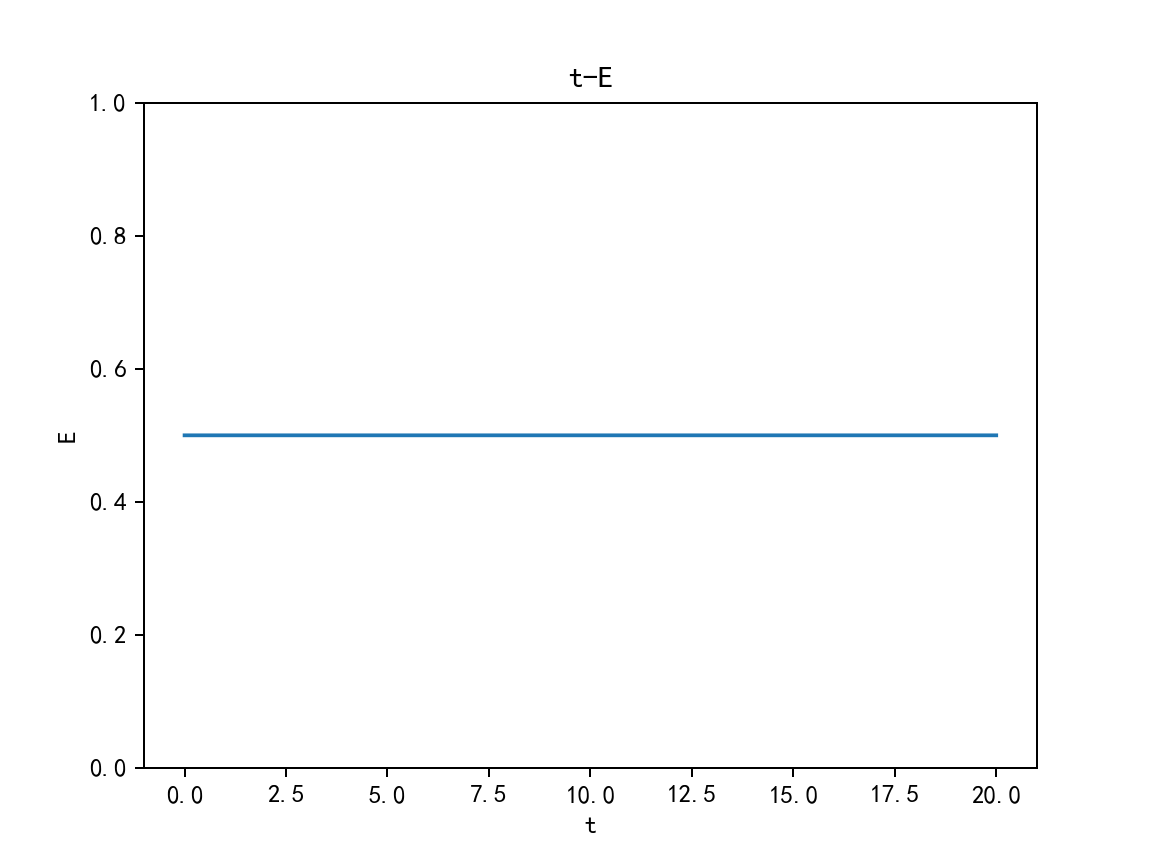

In [184]:
plt.figure()
plt.ylim(0,1)
plt.plot(t1,E1)
plt.title("t-E")
plt.xlabel('t')
plt.ylabel('E')
plt.show()

**显然，由图可知能量守恒,**$E\equiv0.5$
<br>
## 使用4阶龙格库塔法计算

In [249]:
h=0.0002
t=np.linspace(0,20,100000)
x=np.zeros_like(t)
v=np.zeros_like(t)
a=np.zeros_like(t)

In [250]:
x[0]=1
for i in range(99999):
    f1=v[i]
    g1=-x[i]
    f2=v[i]+0.5*h*g1
    g2=-(x[i]+0.5*h*f1)
    f3=v[i]+0.5*h*g2
    g3=-(x[i]+0.5*h*f2)
    f4=v[i]+h*g3
    g4=-(v[i]+h*f3)
    x[i+1]=x[i]+h/6*(f1+2*f2+2*f3+f4)
    v[i+1]=v[i]+h/6*(g1+2*g2+2*g3+g4)


## x-t图像

<IPython.core.display.Javascript object>


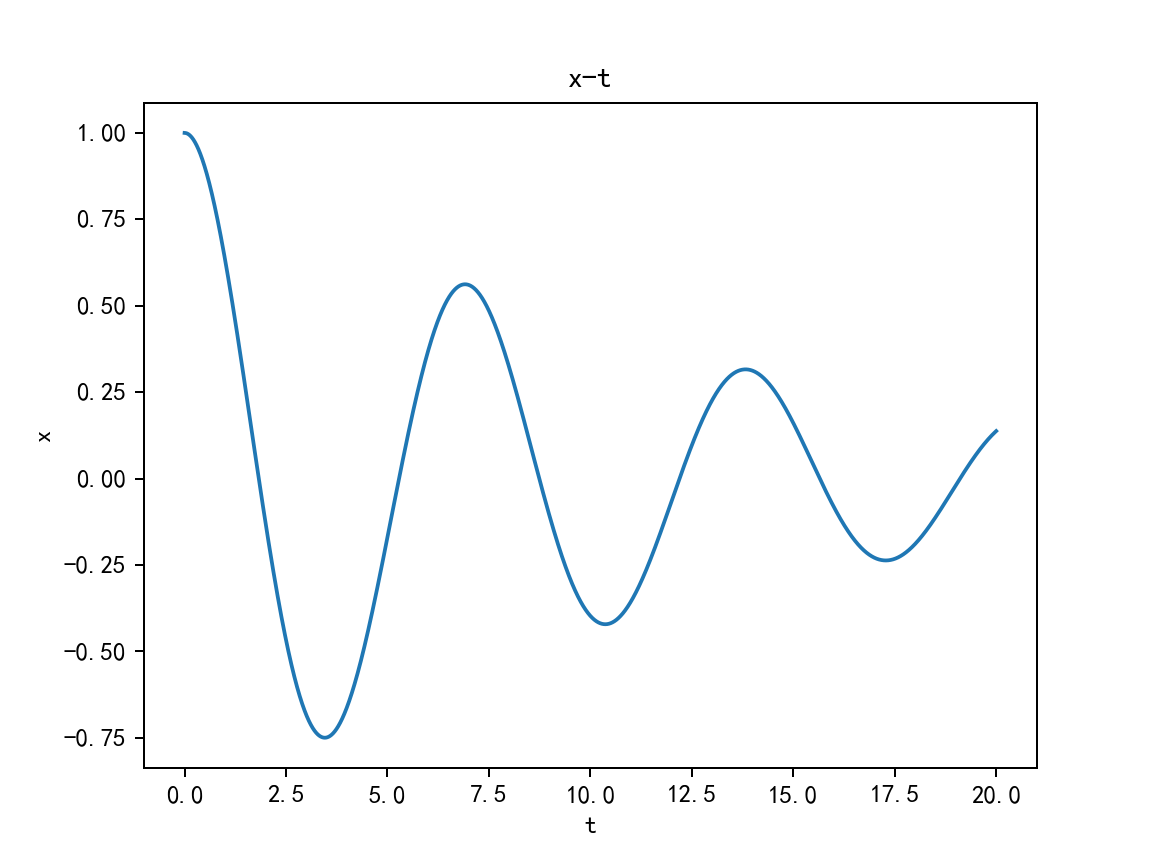

In [251]:
plt.figure()
plt.plot(t,x)
plt.title("x-t")
plt.xlabel('t')
plt.ylabel('x')
plt.show()

## v-x图像

<IPython.core.display.Javascript object>


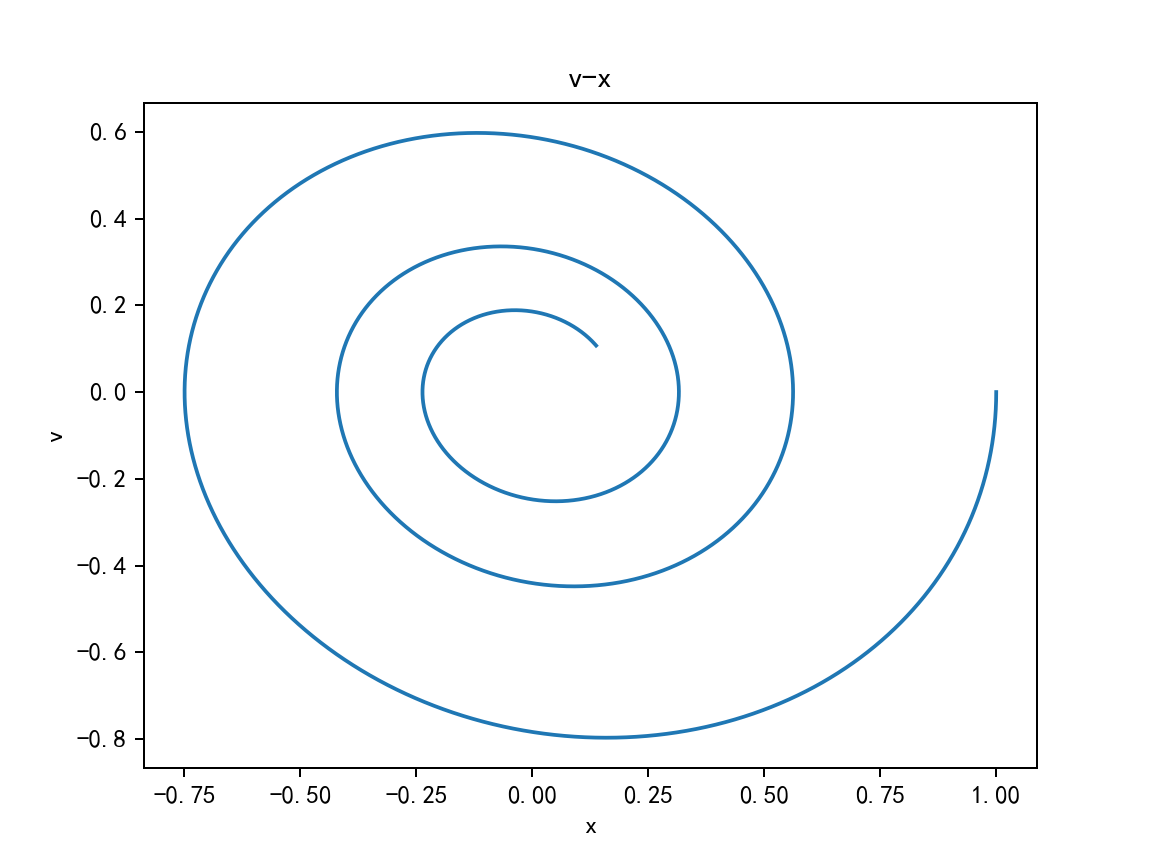

In [252]:
plt.figure()
plt.plot(x,v)
plt.title("v-x")
plt.xlabel('x')
plt.ylabel('v')
plt.show()

## 检验是否能量守恒

In [253]:
E=np.zeros_like(t)
for i in range(99999):
    E[i]=0.5*v[i]*v[i]+0.5*x[i]*x[i]

<IPython.core.display.Javascript object>


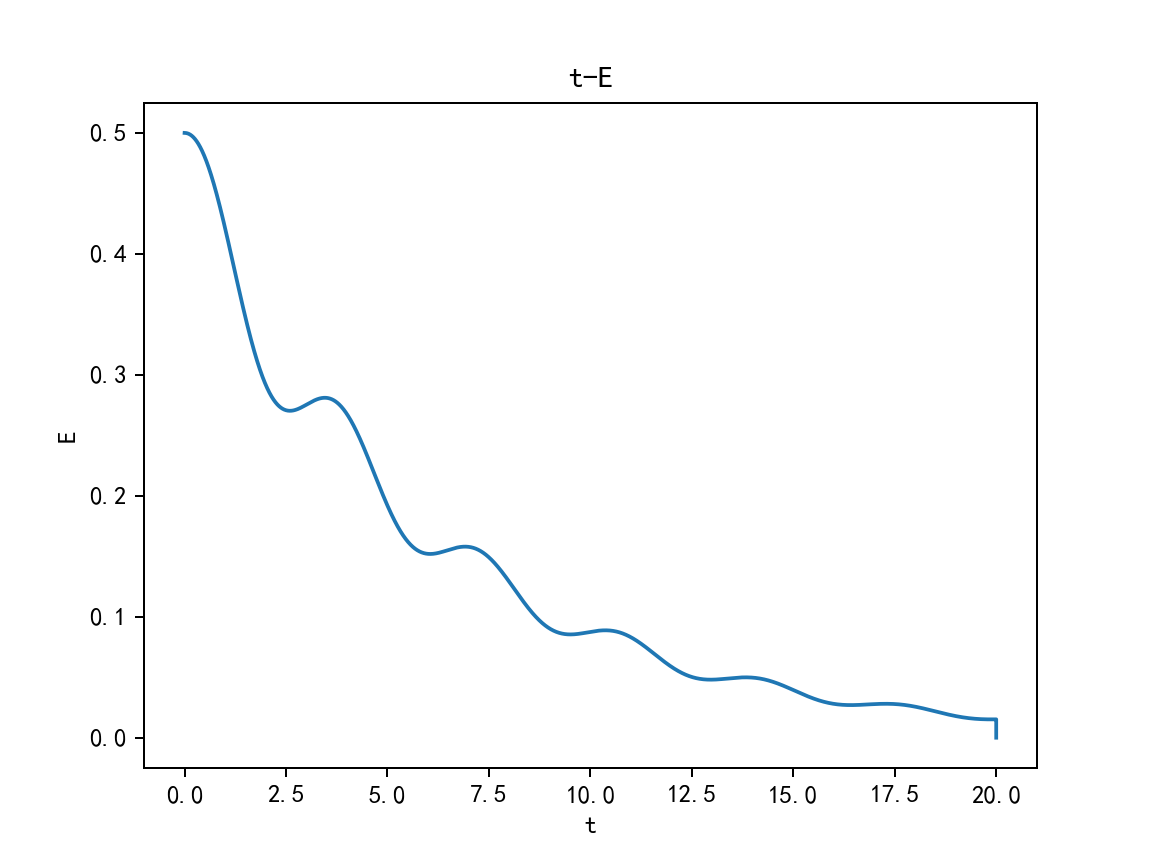

In [254]:
plt.figure()
plt.plot(t,E)
plt.title("t-E")
plt.xlabel('t')
plt.ylabel('E')
plt.show()

**所以，4阶龙格库塔法计算结果能量不守恒，velocity-verlet更好**

In [255]:
import math
o=3
math.sqrt(o)

1.7320508075688772

# 第二题 月球绕地球运动

In [256]:
G=6.67e-11#(N·m2/kg2),万有引力常数
M=5.97e24#(kg),地球质量
T=2.36e6#(s),公转周期
h=T/1000#计算时间间隔
t=np.linspace(0,2*T,2000)
x=np.zeros_like(t)
y=np.zeros_like(t)
vx=np.zeros_like(t)
vy=np.zeros_like(t)
ax=np.zeros_like(t)
ay=np.zeros_like(t)

In [257]:
x[0]=4.06e8#(m)月球远地点距离
y[0]=0#(m)
vx[0]=0
vy[0]=960#远地点速度
R=math.sqrt(x[0]*x[0]+y[0]*y[0])
ax[0]=-G*M/pow(R,3)*x[0]
ay[0]=0

In [258]:
for i in range(1999):
    x[i+1]=x[i]+vx[i]*h+0.5*h*h*ax[i]
    y[i+1]=y[i]+vy[i]*h+0.5*h*h*ay[i]
    vx_temp=vx[i]+0.5*h*ax[i]
    vy_temp=vy[i]+0.5*h*ay[i]
    R=math.sqrt(x[i+1]*x[i+1]+y[i+1]*y[i+1])
    ax[i+1]=-G*M/pow(R,3)*x[i+1]
    ay[i+1]=-G*M/pow(R,3)*y[i+1]
    vx[i+1]=vx_temp+0.5*h*ax[i+1]
    vy[i+1]=vy_temp+0.5*h*ay[i+1]


In [259]:
plt.figure()
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
plt.plot(x,y)
plt.title("月球绕地球运动")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<IPython.core.display.Javascript object>